#### Linear Regression
We will use machine learning techniques to analyze our natural gas data set. Our first insight will be through the simplest model - linear regression. The goal in regression problems is to predict the value of a continuous response variable. 

We will first examine linear regression, which models the relationship between a response variable and each of the explanatory variable. Next, we will consider polynomial regression and regularization methods if necessary.

#### Simple model
Linear regression tries to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. 

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

Let us load our dataset (excluding the outliers - See the section in Anomaly Detection)

In [13]:
%matplotlib inline
import seaborn as sns
import pandas as pd

In [14]:
# Read the data set
df=pd.read_excel("data/DataSet_GasPrice_ Outlier_Removed.xlsx")
df.head()

,Days,Date,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice,Weather,GasPriceStatus
0,245,2008-12-31,57.22,41.12,2227.028,2399.702,5.82,WINTER,HIGH
1,276,2009-01-31,54.37,41.71,2251.938,2729.715,5.24,WINTER,HIGH
2,304,2009-02-28,52.30,39.09,2074.167,2332.539,4.52,WINTER,HIGH
3,335,2009-03-31,44.34,47.94,2262.488,2170.709,3.96,WINTER,HIGH
4,365,2009-04-30,41.92,49.65,2147.856,1741.293,3.50,SPRING,HIGH


We will use one feature at a time

#### GasPrice vs AveCoalPrice
In this case, gas price will be regressed against average coal price

In [15]:
# Use only one feature
x = df.AveCoalPrice[:, np.newaxis]
x_temp = x[:,]
y = df.GasPrice

We now split the data into training/testing sets

In [16]:
# Split the data into training/testing sets
x_train, x_test, y_train, y_test = train_test_split(x_temp, y)

The next step is to create linear regression object

In [17]:
# Create linear regression object
model = linear_model.LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The next step is to train the model using the training sets

In [18]:
# Train the model using the training sets
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We then 
(i) Calculate the coefficients
(ii) Calculate the mean square error
(iii) Calculate the variance score

In [19]:
# The coefficients
model.coef_                     

array([ 0.09000647])

In [20]:
# The mean square error
np.mean((model.predict(x_test) - y_test) ** 2) 

0.4537737627783117

In [21]:
# Explained variance score: 1 is perfect prediction
model.score(x_test, y_test)       

0.40962464644839924

We then generate a regression plot. 

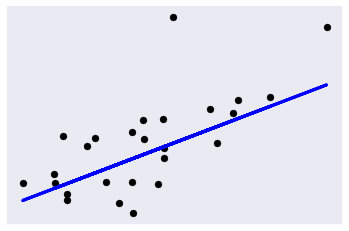

In [22]:
# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, model.predict(x_test), color='blue', linewidth=3)
  
plt.xticks(())
plt.yticks(())
  
plt.show()

#### GasPrice vs OilPrice
In this case, gas price will be regressed against oil price

In [23]:
# Use only one feature
xoil = df.OilPrice[:, np.newaxis]
xoil_temp = xoil[:,]

In [24]:
# Split the data into training/testing sets
xoil_train, xoil_test, y_train, y_test = train_test_split(xoil_temp, y)

In [25]:
# Train the model using the training sets
model.fit(xoil_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
model.coef_                      

array([ 0.01805443])

In [27]:
# The mean square error
np.mean((model.predict(xoil_test) - y_test) ** 2)

0.7014079728062501

In [28]:
# Explained variance score: 1 is perfect prediction
model.score(xoil_test, y_test)       

-0.00044771447042002421

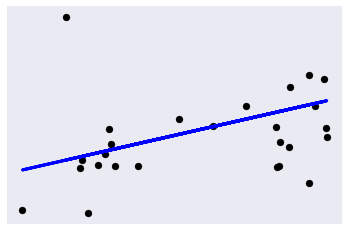

In [29]:
# Plot outputs
plt.scatter(xoil_test, y_test,  color='black')
plt.plot(xoil_test, model.predict(xoil_test), color='blue', linewidth=3)
  
plt.xticks(())
plt.yticks(())
  
plt.show()

#### GasPrice vs GrossGasProd
In this case, gas price will be regressed against Total gas withdrawal

In [30]:
# Use only one feature
xgasProd = df.GrossGasProd[:, np.newaxis]
xgasProd_temp = xgasProd[:,]

In [31]:
# Split the data into training/testing sets
xgasProd_train, xgasProd_test, y_train, y_test = train_test_split(xgasProd_temp, y)

In [32]:
# Train the model using the training sets
model.fit(xgasProd_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
model.coef_                       # array([-0.00253865])

array([-0.00233546])

In [34]:
# The mean square error
np.mean((model.predict(xgasProd_test) - y_test) ** 2) #0.650849941969917

0.5836597244459117

In [35]:
# Explained variance score: 1 is perfect prediction
model.score(xgasProd_test, y_test)       # 0.21002478911081204

0.27572841066357079

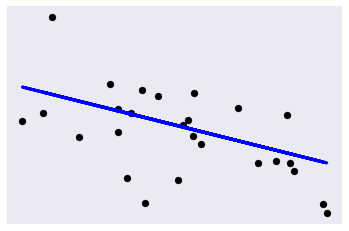

In [36]:
# Plot outputs
plt.scatter(xgasProd_test, y_test,  color='black')
plt.plot(xgasProd_test, model.predict(xgasProd_test), color='blue', linewidth=3)
  
plt.xticks(())
plt.yticks(())
  
plt.show()

#### GasPrice vs TotGasCons
In this case, gas price will be regressed against Total gas Consumption

In [37]:
# Use only one feature
xgasCons = df.TotGasCons[:, np.newaxis]
xgasCons_temp = xgasCons[:,]

In [38]:
# Split the data into training/testing sets
xgasCons_train, xgasCons_test, y_train, y_test = train_test_split(xgasCons_temp, y)

In [39]:
# Train the model using the training sets
model.fit(xgasCons_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
model.coef_                       # array([ 0.00023811])

array([ -7.10985936e-05])

In [41]:
# The mean square error
np.mean((model.predict(xgasCons_test) - y_test) ** 2) #0.8467632738501398

0.8636663101328881

In [42]:
# Explained variance score: 1 is perfect prediction
model.score(xgasCons_test, y_test)       # -0.070892124136128665

-0.014785246865865798

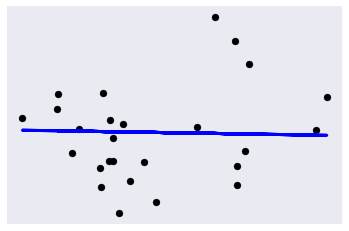

In [43]:
# Plot outputs
plt.scatter(xgasCons_test, y_test,  color='black')
plt.plot(xgasCons_test, model.predict(xgasCons_test), color='blue', linewidth=3)
  
plt.xticks(())
plt.yticks(())
  
plt.show()

#### Cross validation
We used the train_test_split function to randomly partition the data into training and test sets. The proportions of the data for both partitions can be specified using keyword arguments. By default, 25 percent of the data is assigned to the test set. Finally, we trained the model and evaluated it on the test set. The resulted r-squared scores of (-0.62, 0.25, 0.21 and -0.07) indicate that (62%, 25%, 21% and 7%)  of the variance in the test set respectively is explained by the model. However the performance might have changed if a different data was chosen as the training set.

To obtain a better understanding of the estimator's performance, we can use cross-validation, whose goal is to define a dataset to "test" the model in the training phase, in order to limit problems like overfitting, and to give an insight on how the model will generalize to an independent dataset.

##### Cross Validation Score for  GasPrice vs AveCoalPrice
Here we estimate the score using cross validation techniques

In [44]:
%matplotlib inline
import seaborn as sns
import pandas as pd

In [45]:
# Read the data set
df=pd.read_excel("data/DataSet_GasPrice_ Outlier_Removed.xlsx")
df.head()

,Days,Date,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice,Weather,GasPriceStatus
0,245,2008-12-31,57.22,41.12,2227.028,2399.702,5.82,WINTER,HIGH
1,276,2009-01-31,54.37,41.71,2251.938,2729.715,5.24,WINTER,HIGH
2,304,2009-02-28,52.30,39.09,2074.167,2332.539,4.52,WINTER,HIGH
3,335,2009-03-31,44.34,47.94,2262.488,2170.709,3.96,WINTER,HIGH
4,365,2009-04-30,41.92,49.65,2147.856,1741.293,3.50,SPRING,HIGH


In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

In [47]:
# Use only one feature
x = df.AveCoalPrice[:, np.newaxis]
x_temp = x[:,]
y = df.GasPrice

In [48]:
# Split the data into training/testing sets
x_train, x_test, y_train, y_test = train_test_split(x_temp, y)

In [49]:
# Create linear regression object
model_coal = linear_model.LinearRegression()
model_coal

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model_coal, x_temp, df.GasPrice)
scores        # array([-0.51448844, -0.12983661, -1.16023442])

array([-0.51448844, -0.12983661, -1.16023442])

In [51]:
scores.mean() # -0.60151982376799462

-0.60151982376799462

cross_val_score by default uses three-fold cross validation, that is, each instance will be randomly assigned to one of the three partitions. Each partition will be used to train and test the model. It returns the value of the estimator's score method for each round. The r-squared scores range from -0.51 to -1.16. The mean of the scores, -0.60, is a better estimate of the estimator's predictive power than the r-squared score produced from a single train/test split.

##### Cross Validation Score for  GasPrice vs OilPrice
Similarly for GasPrice vs OilPrice

In [52]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, xoil_temp, df.GasPrice)
scores        # array([-2.42739464, -1.12453543, -9.74505381])

array([-2.42739464, -1.12453543, -9.74505381])

In [53]:
scores.mean() # -0.60151982376799462

-4.4323279603806309

#### Basic statistics with .describe()
We will use .describe() method to evaluate a number of basic statistics about the column, such as the mean, min, max, and standard deviation. This can give us a quick overview of the shape of the data.

In [62]:
df.AveCoalPrice.describe()

count    104.000000
mean      42.969885
std        5.893026
min       32.120000
25%       38.430000
50%       43.845000
75%       45.242000
max       57.220000
Name: AveCoalPrice, dtype: float64

In [63]:
df.OilPrice.describe()

count    104.000000
mean      74.448942
std       23.128380
min       30.320000
25%       49.747500
50%       78.160000
75%       94.685000
max      109.530000
Name: OilPrice, dtype: float64

In [64]:
df.GrossGasProd.describe()

count     104.000000
mean     2483.810894
std       214.623551
min      2047.815000
25%      2309.531750
50%      2503.193500
75%      2678.402000
max      2823.658000
Name: GrossGasProd, dtype: float64

In [66]:
df.TotGasCons.describe()

count     104.000000
mean     2147.033875
std       413.690109
min      1504.000000
25%      1854.047500
50%      2005.892500
75%      2494.061500
max      3204.129000
Name: TotGasCons, dtype: float64

In [67]:
df.GasPrice.describe()

count    104.000000
mean       3.531635
std        0.914510
min        1.730000
25%        2.850000
50%        3.520000
75%        4.097500
max        6.000000
Name: GasPrice, dtype: float64

In [78]:
bin_values = np.arange(start=1.0, stop=7, step=0.10)

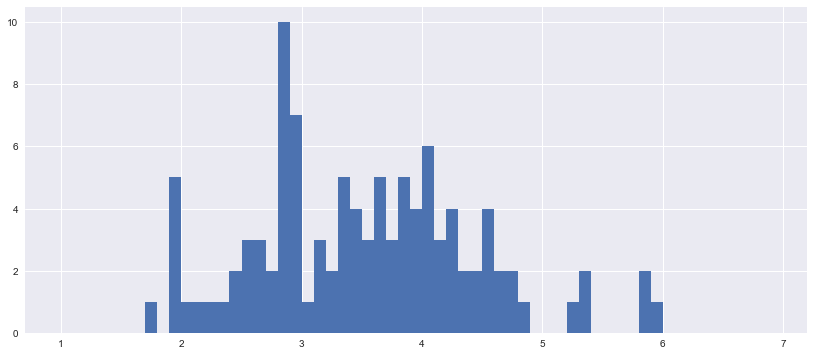

In [79]:
GasPrice_hist = df.GasPrice[df['GasPrice'] !=0.0]
GasPrice_hist.hist(bins=bin_values, figsize=[14,6])

In [80]:
df.describe()

,Days,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,1811.461538,42.969885,74.448942,2483.810894,2147.033875,3.531635
std,918.186466,5.893026,23.128380,214.623551,413.690109,0.914510
min,245.000000,32.120000,30.320000,2047.815000,1504.000000,1.730000
25%,1027.000000,38.430000,49.747500,2309.531750,1854.047500,2.850000
50%,1811.000000,43.845000,78.160000,2503.193500,2005.892500,3.520000
75%,2594.500000,45.242000,94.685000,2678.402000,2494.061500,4.097500
max,3379.000000,57.220000,109.530000,2823.658000,3204.129000,6.000000


## Linear regression with Natural Gas Data Set (All variables)
In this section: we will use the natural gas data set to fit a linear regression model and predict Natural Gas Spot prices. We will use the least squares method to estimate the coefficients. We will use YY  to denote the Hub Natural Gas Spot Prices (GasPrices) and XX to denote all the other features (or independent variables).

Fristly, we drop the columns which are not required for linear regression - These are df.Days, df.Date, df.Weather and df.GasPriceStatus 

Then, we assign attributes to the required columns for linear regression. We will also keep only the required variables. The variables required for linear regression are:

1. AveCoalPrice ~ COALP
2. OilPrice ~ OILP
3. GrossGasProd ~ GPROD
4. TotGasCons ~ GCONS
5. GasPrice ~ GASP

In [99]:
# Read the data set
df=pd.read_excel("data/DataSet_GasPrice_ Outlier_Removed.xlsx")
df.head()

,Days,Date,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice,Weather,GasPriceStatus
0,245,2008-12-31,57.22,41.12,2227.028,2399.702,5.82,WINTER,HIGH
1,276,2009-01-31,54.37,41.71,2251.938,2729.715,5.24,WINTER,HIGH
2,304,2009-02-28,52.30,39.09,2074.167,2332.539,4.52,WINTER,HIGH
3,335,2009-03-31,44.34,47.94,2262.488,2170.709,3.96,WINTER,HIGH
4,365,2009-04-30,41.92,49.65,2147.856,1741.293,3.50,SPRING,HIGH


In [104]:
# Drop the columns which are not required for linear regression
df_mreg = df.drop(df.columns[[0, 1, 7, 8]], axis=1)  # df.columns is zero-based pd.Index 
df_mreg.head()

,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice
0,57.22,41.12,2227.028,2399.702,5.82
1,54.37,41.71,2251.938,2729.715,5.24
2,52.30,39.09,2074.167,2332.539,4.52
3,44.34,47.94,2262.488,2170.709,3.96
4,41.92,49.65,2147.856,1741.293,3.50


In [105]:
#Assign attributes once again to the the column names
df_mreg.columns = ['COALP', 'OILP', 'GPROD', 'GCONS', 'GASP']
print (df_mreg.tail())

     COALP   OILP     GPROD     GCONS  GASP
99   36.01  49.33  2771.238  2504.056  2.88
100  36.35  51.06  2678.402  1907.358  3.10
101  36.21  48.48  2678.402  2314.810  3.15
102  36.21  45.18  2678.402  2504.056  2.98
103  36.32  45.18  2678.402  1907.358  2.98


In [106]:
# Drop the YY column, which is the column for the Gas Price (the dependent variable) 
from sklearn.linear_model import LinearRegression
X = df_mreg.drop('GASP', axis = 1)
print(X.head())

   COALP   OILP     GPROD     GCONS
0  57.22  41.12  2227.028  2399.702
1  54.37  41.71  2251.938  2729.715
2  52.30  39.09  2074.167  2332.539
3  44.34  47.94  2262.488  2170.709
4  41.92  49.65  2147.856  1741.293


Now that we have data for linear regression, we will create a linear regression object. We will then create the three main functions of linear regression: 
1. lm.fit() - To fit a linear model 
2. lm.predict() - To Predict Y using the linear model with estimated coefficients
3. lm.score() - Returns the coefficient of determination (R^2). The coefficient of determination is a measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model.

In [107]:
# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
lm.fit(X, df_mreg.GASP)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
# Generate the coefficients
lm.coef_

array([ 0.05518952,  0.00292161, -0.00167768,  0.00039159])

In [110]:
# Generate the intercepts
lm.intercept_

4.2689265766390445

Here we print the coefficients

In [111]:
# The coefficients
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,COALP,0.055190
1,OILP,0.002922
2,GPROD,-0.001678
3,GCONS,0.000392


#### The coefficients
The coefficient of 0.055190 for the COALP variable means that as the average coal price increases by 1 Dollar, the predicted value of GASP (the spot price of natural gas) increases by 6 cents. For the OILP variable, a coefficient of 0.002922 means that as the oil price (WTI) increases by 10 Dollars, natural Gas price (GASP) increases by 3 cents. The coefficient of -0.001678 suggests that a decrease of 1Bscf in gas production will result in 1.7 Dollars increase in gas price while gas consumption or increase in demand for gas of 1 Bscf will result in  40 cents increase in price.

The metrics tend to support the hypotheses that increase in coal price and oil price result in increase in natural gas price. Gas price is also affected by demand and supply: If gas production increases, it drives down the gas price, while increase in demand will affect gas price positively.   

In [112]:
# The score
lm.score(X, df_mreg.GASP)

0.47222528715936246

### The score - R-Squared
The R-squared is the percentage of variance our model explains. We can see here that this model has a moderate R-squared value — 0.472, meaning that this model explains 47.2% of the variance in our dependent variable. 

We can calculate the predicted prices ( Ŷ iY^i ) using lm.predict. Ŷ i=β̂ 0+β̂ 1X1+…β̂ 13X13 Y^i=β^0+β^1X1+…β^13X13
Generate the first five predicted prices

lm.predict(X)[0:5]

### Residual sum of squares
We will now calculate the Residual sum of square. This is a statistical technique used to measure the amount of variance in a data set that is not explained by the regression model. The residual sum of squares is a measure of the amount of error remaining between the regression function and the data set. For our regression model the value is 45.46. 

We will subsequently calculate the mean of the residual sum of squares.

In [115]:
print (np.sum((df_mreg.GASP - lm.predict(X)) ** 2))

45.46347543051641


In [117]:
mseX = np.mean((df_mreg.GASP - lm.predict(X)) ** 2)
print (mseX)

0.43714880221650393


## Training and Test Data sets

In this section, we will investigate the goodness of fit if we are presented with data different from the data set we have used to construct this model. This will help us in prediction. One of the solutions is to split our data set into two (one group left out (for testing) and while the rest us used to train the model. Cross validation will be carried out after this split and analysis.

Let us start by splitting the data into random train and test subsets using the function train_test_split in sklearn.cross_validation.

In [122]:
import numpy as np
import sklearn
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(
    X, df_mreg.GASP, test_size=0.33, random_state = 5)
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(69, 4)
(35, 4)
(69,)
(35,)


### Linear Regression of the Training Data Sets
Let's build a linear regression model using our new training data set. 
We will:
(1) Fit a linear regression model to the training set
(2) Predict the output on the test set

In [123]:
# Build a linear regression object and fit the linear regression model for the training data set
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
# Predict the first five test Gas prices
lm.predict(X_test)[0:5]

array([ 3.56578505,  3.49385706,  4.1569175 ,  3.9835436 ,  2.65611684])

In [125]:
# mean square error for X_test
mseX_test = np.mean((Y_test - lm.predict(X_test)) ** 2)
print(mseX_test)

0.6306954835175395


In [126]:
# mean square error for X_train
mseX_train = np.mean((Y_train - lm.predict(X_train)) ** 2)
print(mseX_train)

0.3477736361647329


### Residual Plots
Let us compare the residuals in a resudual plot

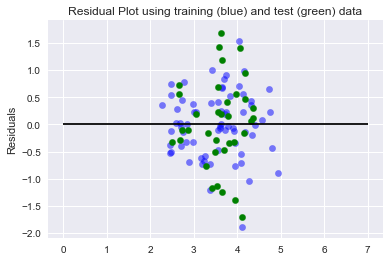

In [128]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 7)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

### Accuracy Score
We now print the accuracy score

In [129]:
 print (lm.fit(X_train, Y_train).score(X_test, Y_test))

0.269062493854


### Cross Validation
There are some inherent dangers in the train/test split which we carried out above: For instance, what if the split we made isn’t random? What if one subset of our data has only data from a certain year, period (winter, summer, Autumn or spring) or the data is from certain features. This will result in overfitting, even though we’re trying to avoid it! This is where cross validation comes in.

In this section, we apply the train/test split to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.
We will use K-Folds Cross Validation and the Leave One Out Cross Validation (LOOCV)

#### K-Folds Cross Validation
In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

In [130]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [132]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
  

TRAIN: [ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51] TEST: [ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103]


As we can see, the function splits the original data into different subsets of the data.

### Leave One Out Cross Validation (LOOCV)
In this type of cross validation, the number of folds (subsets) equals to the number of observations we have in the dataset. We then average ALL of these folds and build our model with the average. We then test the model against the last fold. Because we would get a big number of training sets (equals to the number of samples), this method is very computationally expensive but we are using it because our dataset is small datasets.

The more folds we have, we will be reducing the error due the bias but increasing the error due to variance; the computational price would go up too, obviously — the more folds we have, the longer it would take to compute it and we would need more memory. With a lower number of folds, we’re reducing the error due to variance, but the error due to bias would be bigger. It would also computationally cheaper. Therefore, in big datasets, k=3 is usually advised. In smaller datasets it’s best to use LOOCV.
We will use the cross_val_predict function to return the predicted values for each data point when it’s in the testing slice.

In [133]:
from sklearn.model_selection import LeaveOneOut 
loo = LeaveOneOut()
loo.get_n_splits(X)

104

In [134]:
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103] TEST: [0]
TRAIN: [  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103] TEST: [1]
TRAIN: [  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30

In [135]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

Recall that we ’ve created the train/test split for our dataset and fitted a model. Let’s see what the score of our model is after cross validation:

In [137]:
# Drop the YY column, which is the column for the Gas Price (the dependent variable) 
from sklearn.linear_model import LinearRegression
Y = df_mreg.GASP
print(Y.head())

0    5.82
1    5.24
2    4.52
3    3.96
4    3.50
Name: GASP, dtype: float64


In [146]:
# Perform 6-fold cross validation
scores = cross_val_score(lm.fit(X_train, Y_train), X, Y, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [-0.44481758 -0.24067487 -4.58109763 -3.23456624 -0.0528911   0.16772978]


As we can see, the last fold improved the score of the original model — from 0.0528911 to 0.16772978. Now, let’s plot the new predictions, after performing cross validation:

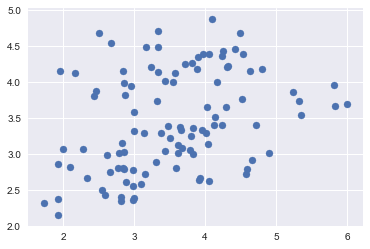

In [148]:
# Make cross validated predictions
predictions = cross_val_predict(lm.fit(X_train, Y_train), X, Y, cv=6)
plt.scatter(Y, predictions)

We can see our scatter plot is very different from the original plot (its now a near perfect correlation). It is six times as many points as the original plot because we used cv=6.
Finally, let’s check the R² score of the model (R² is a “number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s)”. Basically, how accurate is our model):

In [149]:
accuracy = metrics.r2_score(Y, predictions)
print ('Cross-Predicted Accuracy:', accuracy)


Cross-Predicted Accuracy: -0.0688343792343
